In [1]:
import graphviz
import pandas as pd


from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 读取数据
df = pd.read_excel("判断男女.xlsx")

In [3]:
# 探索数据
# 全局信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
编号    8 non-null int64
身高    8 non-null object
体重    8 non-null object
鞋码    8 non-null object
性别    8 non-null object
dtypes: int64(1), object(4)
memory usage: 400.0+ bytes
None


In [4]:
# 连续型信息
print(df.describe())

            编号
count  8.00000
mean   4.50000
std    2.44949
min    1.00000
25%    2.75000
50%    4.50000
75%    6.25000
max    8.00000


In [5]:
# 离散型信息
print(df.describe(include=["O"]))

       身高 体重 鞋码 性别
count   8  8  8  8
unique  3  3  3  2
top     中  中  中  男
freq    3  4  3  4


In [6]:
# 输出前5个
print(df.head())

   编号 身高 体重 鞋码 性别
0   1  高  重  大  男
1   2  高  重  大  男
2   3  中  中  大  男
3   4  中  中  中  男
4   5  矮  轻  小  女


In [7]:
# 输出后5个
print(df.tail())

   编号 身高 体重 鞋码 性别
3   4  中  中  中  男
4   5  矮  轻  小  女
5   6  矮  轻  小  女
6   7  矮  中  中  女
7   8  中  中  中  女


In [8]:
# 选择特征数据
features = ["身高", "体重", "鞋码"]
df_features = df[features]
# 选择结果数据
df_labels = df["性别"]
# 生成特征值矩阵
dvec = DictVectorizer(sparse=False)
# 新矩阵
df_features = dvec.fit_transform(df_features.to_dict(orient="record"))
print(dvec.feature_names_)
print(df_features)

['体重=中', '体重=轻', '体重=重', '身高=中', '身高=矮', '身高=高', '鞋码=中', '鞋码=大', '鞋码=小']
[[0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]]


In [13]:
# 构造决策树ID3
clf = DecisionTreeClassifier(criterion="entropy")
# 决策树训练
clf.fit(df_features, df_labels)
# 决策树预测
# print(type(df_features))
# print(pd.np.array([0, 1, 0, 0, 0, 1, 1, 0, 0,]))
pred_labels = clf.predict(pd.np.array([[0, 1, 0, 0, 0, 1, 1, 0, 0,],]))
# 输出分类结果
print("输出分类结果:")
print(pred_labels)
# 决策树准确率
acc_decision_tree = round(clf.score(df_features, df_labels), 6)
print(acc_decision_tree)

输出分类结果:
['女']
0.875


In [10]:
df_labels.unique()

array(['男', '女'], dtype=object)

|--- 鞋码=大 <= 0.50
|   |--- 身高=矮 <= 0.50
|   |   |--- class: 女
|   |--- 身高=矮 >  0.50
|   |   |--- class: 女
|--- 鞋码=大 >  0.50
|   |--- class: 男



'判断男女决策树.png'

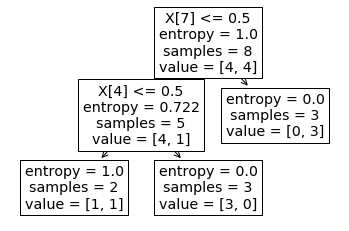

In [11]:
# 绘制决策树
decision_tree = "判断男女决策树"
# 1.简单绘制决策树
tree.plot_tree(clf)

# 2.输出决策树, 文字版
r = tree.export_text(decision_tree=clf, feature_names=dvec.feature_names_)
print(r)

# 3.Graphviz形式输出决策树
# pip install graphviz
# 然后官网下载安装包,并将bin路径添加到path中
# 3.1Graphviz形式输出决策树(简单)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render(decision_tree)
# 3.2Graphviz形式输出决策树(视觉优化)
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=dvec.feature_names_,
    class_names=df_labels.unique(),
    filled=True,
    rounded=True,
    special_characters=True,
)
# 处理中文乱码
graph = graphviz.Source(dot_data.replace("helvetica", "FangSong"))
# graph.render("决策树")
# 生成路径在当前文件夹内
graph.view(decision_tree)
# 生成图片
graph.render(filename=decision_tree, format="png")